In [44]:
import pickle
import cv2
import numpy as np
import pandas as pd
import json
import jsonlines
import random
from IPython.display import Image 
from IPython.display import display

In [45]:
annotPATH = '/mnt3/user16/vcr/vcr1annots/'
imagePATH = '/mnt3/user16/vcr/vcr1images/'

In [46]:
data = []
with jsonlines.open(annotPATH + 'val.jsonl') as f:
    for line in f.iter():
        data.append(line)


In [74]:
with open('../results/uniter.pickle', 'rb') as f:
    qa_prediction = np.array(pickle.load(f))
    qa_label = np.array(pickle.load(f))
    qar_prediction = np.array(pickle.load(f))
    qar_label = np.array(pickle.load(f))

with open('../results/counterfactual.pickle', 'rb') as f:
    cqa_prediction = np.array(pickle.load(f))
    cqa_label = np.array(pickle.load(f))
    cqar_prediction = np.array(pickle.load(f))
    cqar_label = np.array(pickle.load(f))

In [360]:
filePATH = 'both_wrong.pickle'

with open(filePATH, 'rb') as f:
    index = pickle.load(f)


In [361]:
def list_to_str_only(text_list):
    new_text = ''
    for i, ele in enumerate(text_list):
        if type(ele) == type([]):
            for e in ele:
                # if len(name)-1 < int(e):
                #     tmp = f'{e} '
                # else:
                #     tmp = name[int(e)] + f'_{e} '
                tmp = f'{e} '
                new_text += tmp
        else:
            new_text += ele
        new_text += ' '
    return new_text

In [365]:
def choices_to_str(choices):
    result = ''
    for i, choice in enumerate(choices):
        result += list_to_str_only(choice)
        if i != 3:
            result += '\n'
    
    return result

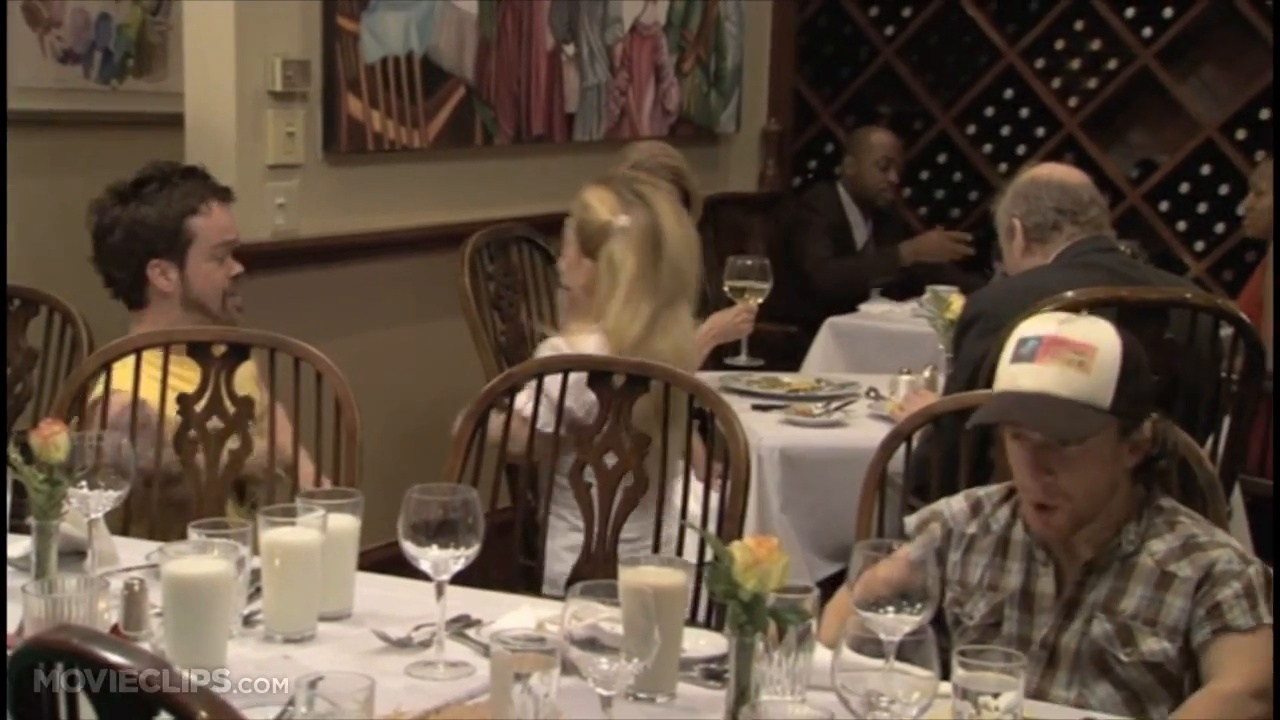

In [366]:
random.shuffle(index)
Image(imagePATH + data[index[0]]['img_fn'])

In [367]:
print('Q: ', list_to_str_only(data[index[0]]['question']))
print('---A---:')
print(choices_to_str(data[index[0]]['answer_choices']))
print('label: ', data[index[0]]['answer_label'], '| uniter_pred: ', qa_prediction[index[0]], '| counter_pred: ', cqa_prediction[index[0]])
print('---I think so because...---')
print(choices_to_str(data[index[0]]['rationale_choices']))
print('label: ', data[index[0]]['rationale_label'], '| uniter_pred: ', qar_prediction[index[0]], '| counter_pred: ', cqar_prediction[index[0]])

Q:  Who did 3  arrive with ? 
---A---:
She came with 4  . 
3  was ordered to do tasks by a general . 
He came with 4  . 
He came to see the lady at the top of the stairs . 
label:  0 | uniter_pred:  0 | counter_pred:  2
---I think so because...---
They ' re seated close together and since she ' s a kid she wouldn ' t be there alone . 
4  is older and therefore owns the house while 3  came over for a visit . 
The pair are stepping onto the elevator together . 
They are standing in a restaurant and talking with each other . 
label:  3 | uniter_pred:  0 | counter_pred:  0


In [202]:
count = 0
qa_count = 0
qar_count = 0
for i in index:
    if qa_prediction[i] != cqa_prediction[i]:
        if qar_prediction[i] != cqar_prediction[i]:
            count += 1
print(count, count/len(index)*100, qa_count, qar_count)

218 6.987179487179487 0 0


In [355]:
index[0]

10259